# Plot Embeddings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from arqmath_code.topic_file_reader import TopicReader, Topic
from src.pre_processors.remove_xml_tags import RemoveXMLTagsFromQueries

In [6]:
embeddings_with_tags = np.load("../arqmath_dataset/model_embeddings/document_embeddings_all-MiniLM-L6-v2-with-tags.npy")
embeddings_without_tags = np.load("../arqmath_dataset/model_embeddings/document_embeddings_all-MiniLM-L6-v2-without-tags.npy")

In [2]:
topics = list(TopicReader("../arqmath_dataset/Topics/Topics_Task1_2022_V0.1.xml").map_topics.values())
model = SentenceTransformer("all-MiniLM-L6-v2")
topic_embeddings = model.encode([topic.title for topic in topics])

In [3]:
print(topics[0].title)

Inequality between norm 1,norm 2 and norm <span class="math-container" id="q_1">$\infty$</span> of Matrices


In [5]:
with_eq = []
without_eq = []
for i in range(len(topics)):
    if '<span class="math-container"' in topics[i].title:
        with_eq.append(i)
    else: without_eq.append(i)
with_eq, without_eq

([0,
  1,
  3,
  4,
  9,
  10,
  11,
  12,
  16,
  17,
  18,
  20,
  22,
  27,
  28,
  30,
  33,
  35,
  37,
  39,
  51,
  53,
  54,
  55,
  59,
  62,
  65,
  66,
  67,
  70,
  71,
  72,
  73,
  76,
  78,
  79,
  80,
  81,
  85,
  86,
  87,
  89,
  90,
  93,
  95,
  99],
 [2,
  5,
  6,
  7,
  8,
  13,
  14,
  15,
  19,
  21,
  23,
  24,
  25,
  26,
  29,
  31,
  32,
  34,
  36,
  38,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  56,
  57,
  58,
  60,
  61,
  63,
  64,
  68,
  69,
  74,
  75,
  77,
  82,
  83,
  84,
  88,
  91,
  92,
  94,
  96,
  97,
  98])

In [7]:
topics_without_tags = RemoveXMLTagsFromQueries()(queries=topics)
topic_embeddings_without_tags = model.encode([topic.title for topic in topics])

In [8]:
pca = PCA(n_components=2)
with_tags_transformed = pd.DataFrame(pca.fit_transform(embeddings_with_tags))
without_tags_transformed = pd.DataFrame(pca.fit_transform(embeddings_without_tags))
topics_transformed = pd.DataFrame(pca.fit_transform(topic_embeddings))
topics_without_tags_transformed = pd.DataFrame(pca.fit_transform(topic_embeddings_without_tags))
with_tags_transformed

,0,1
0,-0.100556,-0.077902
1,-0.082227,0.043369
2,-0.102988,-0.048526
3,-0.231465,0.025397
4,-0.133633,0.085381
...,...,...
1020580,-0.160430,-0.101936
1020581,-0.176665,0.067188
1020582,-0.272121,-0.145794
1020583,-0.171741,0.337101


In [9]:
topics_with_tags_with_eq = topics_transformed.iloc[with_eq]
topics_with_tags_without_eq = topics_transformed.iloc[without_eq]
topics_without_tags_with_eq = topics_without_tags_transformed.iloc[with_eq]
topics_without_tags_without_eq = topics_without_tags_transformed.iloc[without_eq]
topics_with_tags_with_eq

,0,1
0,0.327408,-0.093979
1,0.459105,0.028592
3,0.131924,-0.051144
4,0.171018,-0.125368
9,0.409818,0.154970
10,0.396264,-0.124218
11,0.405477,0.149949
12,0.266960,0.400628
16,0.315558,-0.226301
17,0.405743,-0.144786


/opt/homebrew/Caskroom/miniconda/base/envs/IR/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


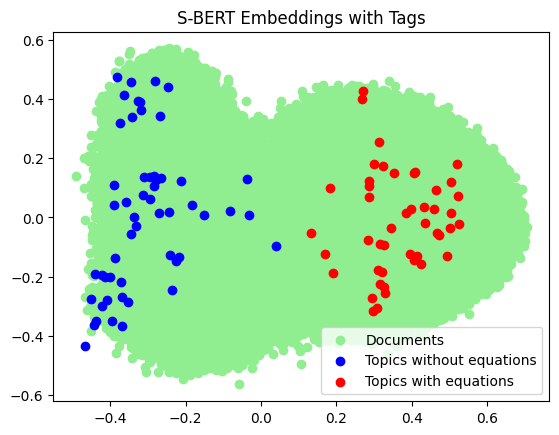

In [10]:
plt.scatter(with_tags_transformed[0], with_tags_transformed[1], label="Documents", c="lightgreen")
plt.scatter(topics_with_tags_without_eq[0], topics_with_tags_without_eq[1], label="Topics without equations", c="blue")
plt.scatter(topics_with_tags_with_eq[0], topics_with_tags_with_eq[1], label="Topics with equations", c="red")
plt.title("S-BERT Embeddings with Tags")
plt.legend()
plt.show()

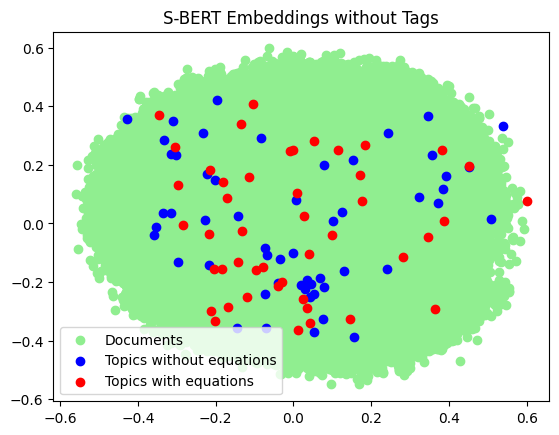

In [11]:
plt.scatter(without_tags_transformed[0], without_tags_transformed[1], label="Documents", c="lightgreen")
plt.scatter(topics_without_tags_without_eq[0], topics_without_tags_without_eq[1], label="Topics without equations", c="blue")
plt.scatter(topics_without_tags_with_eq[0], topics_without_tags_with_eq[1], label="Topics with equations", c="red")
plt.title("S-BERT Embeddings without Tags")
plt.legend()
plt.show()

# Plot results

In [2]:
res_df = pd.read_csv("../results/complete_results_v1.tsv", sep='\t')
res_df

,System,nDCG',mAP',p@10
0,lda_200,0.084163,0.023414,0.088327
1,lda,0.065576,0.015154,0.087091
2,pyterrier-bm25,0.003074,0.000462,0.005263
3,pyterrier-tf-idf,0.055545,0.011563,0.064924
4,SBert-Cross-Encoder-Without-Tags,0.180882,0.041888,0.128550
5,SBert-Cross-Encoder,0.128694,0.032553,0.140237
6,SBert,0.165728,0.036294,0.114267
7,SBertWithoutTags,0.200459,0.044785,0.110372
8,baseline_task1_tf_idf_pyterrier,0.191937,0.035951,0.066223


<AxesSubplot: title={'center': 'System Comparison'}, ylabel='System'>

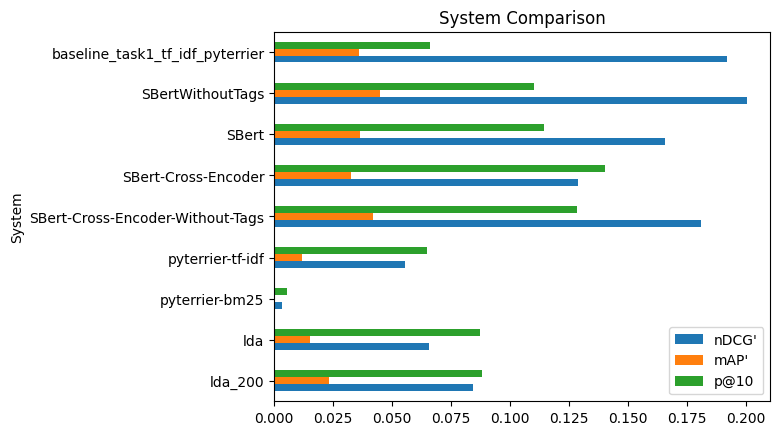

In [3]:
res_df.plot.barh(x='System', title='System Comparison')